In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import torch 
import torch.optim as optim
import pandas as pd
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset,Dataset
from sklearn.model_selection import KFold
import sys
sys.path.append('D:\Desktop\Вся прога на питоне\Задача по курсовой')
from functions import ONP_Adagrad,ONP,to_exel,to_exel_GB
from sklearn.feature_extraction.text import TfidfVectorizer

<>:20: SyntaxWarning: invalid escape sequence '\D'
<>:20: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Роман\AppData\Local\Temp\ipykernel_16196\3382926744.py:20: SyntaxWarning: invalid escape sequence '\D'
  sys.path.append('D:\Desktop\Вся прога на питоне\Задача по курсовой')


In [2]:
train = pd.read_csv('D:/Desktop/Вся прога на питоне/Задача по курсовой/mtsgrvmgn_trn.csv')
test = pd.read_csv('D:/Desktop/Вся прога на питоне/Задача по курсовой/mtsgrvmgn_tst.csv')
valid = pd.read_csv('D:/Desktop/Вся прога на питоне/Задача по курсовой/mtsgrvmgn_vld.csv')

In [3]:
col = ['H1_8','H2_8','H3_8']
# col = ['H1_8']
y_train = train[col]
y_valid = valid[col]
y_test = test[col]
X_test = test.drop(col, axis=1)
common_columns = X_test.columns.intersection(train.columns)
X_train = train[common_columns]
X_test = X_test[common_columns]
X_valid = valid[common_columns]

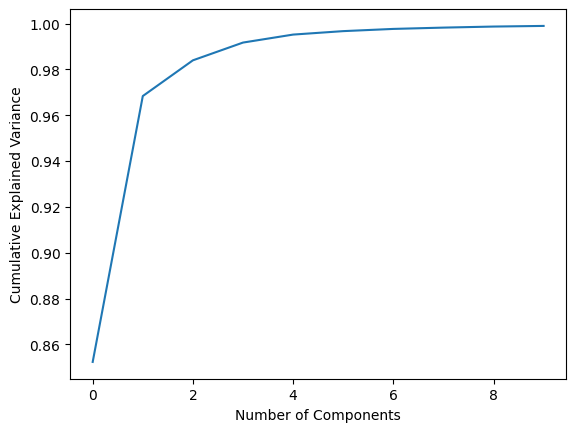

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=10).fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()






In [4]:
from sklearn.decomposition import PCA    
for n_comp in range(2000,2001,10):
# Шаг 1: Нормализация данных


    # vectorizer = TfidfVectorizer()
    # X_train = vectorizer.fit_transform(X_train)
    # X_test = vectorizer.transform(X_test)
    # X_valid= vectorizer.transform(X_valid)
    scaler = StandardScaler()
    data_normalized_x_train = scaler.fit_transform(X_train)
    # data_normalized_y_train = scaler.fit_transform(y_train)
    data_normalized_x_test = scaler.fit_transform(X_test)
    # data_normalized_y_test = scaler.fit_transform(y_test)
    data_normalized_x_valid = scaler.fit_transform(X_valid)
    # data_normalized_y_valid = scaler.fit_transform(y_valid)
    # n_comp = 10
    pca = PCA(n_components=n_comp)
    X_tr = pd.DataFrame(pca.fit_transform(X_train))
    # X_te = pd.DataFrame(pca.transform(X_test))
    # X_val = pd.DataFrame(pca.transform(X_valid))
    with pd.ExcelWriter(f'n_comp1{n_comp}.xlsx', engine='openpyxl') as writer:
        for i in range(1):
                    TE,CV,CVE = ONP(X_train=X_tr,y_train=y_train,
                                    X_valid=X_valid,y_valid=y_valid,
                                    X_test=X_test,y_test=y_test,batch_size=64,
                                    input_dim=X_tr.shape[1],output_dim=3,learning_rate=0.001,num_epochs=50,patience=10,graph=True)
                    if i == 0:
                        TE.to_excel(writer, sheet_name='TE', index=False, startrow=0, startcol=i * 4)
                    else:
                        TE.to_excel(writer, sheet_name='TE', index=False, startrow=0, startcol=i * 4 + 1)
                    # Записываем CV
                    if i == 0:
                        CV.to_excel(writer, sheet_name='CV', index=False, startrow=0, startcol=i * 4)
                    else:
                        CV.to_excel(writer, sheet_name='CV', index=False, startrow=0, startcol=i * 4 + 1)
                    # Записываем CVE
                    if i == 0:
                        CVE.to_excel(writer, sheet_name='CVE', index=False, startrow=0, startcol=i * 4)
                    else:
                        CVE.to_excel(writer, sheet_name='CVE', index=False, startrow=0, startcol=i * 4 + 1)
    

IndexError: At least one sheet must be visible

In [9]:
from sklearn.decomposition import PCA    
for n_comp in range(2000,2001,10):
# Шаг 1: Нормализация данных


    # vectorizer = TfidfVectorizer()
    # X_train = vectorizer.fit_transform(X_train)
    # X_test = vectorizer.transform(X_test)
    # X_valid= vectorizer.transform(X_valid)
    scaler = StandardScaler()
    data_normalized_x_train = scaler.fit_transform(X_train)
    # data_normalized_y_train = scaler.fit_transform(y_train)
    data_normalized_x_test = scaler.fit_transform(X_test)
    # data_normalized_y_test = scaler.fit_transform(y_test)
    data_normalized_x_valid = scaler.fit_transform(X_valid)
    # data_normalized_y_valid = scaler.fit_transform(y_valid)
    # n_comp = 10
    pca = PCA(n_components=n_comp)
    X_tr = pd.DataFrame(pca.fit_transform(X_train))
    X_te = pd.DataFrame(pca.transform(X_test))
    X_val = pd.DataFrame(pca.transform(X_valid))
    with pd.ExcelWriter(f'n_comp{n_comp}.xlsx', engine='openpyxl') as writer:
        for i in range(1):
                to_exel_GB (file_name=f'n_comp_GB{n_comp}.xlsx',
        n_coloumns=4,n_iter=1,X_train=X_tr,y_train=y_train,
        X_valid=X_val,y_valid=y_valid,X_test=X_te,y_test=y_test,n_estimators=256,max_depth=5)
                if i == 0:
                        TE.to_excel(writer, sheet_name='TE', index=False, startrow=0, startcol=i * 4)
                else:
                        TE.to_excel(writer, sheet_name='TE', index=False, startrow=0, startcol=i * 4 + 1)
                    # Записываем CV
                if i == 0:
                        CV.to_excel(writer, sheet_name='CV', index=False, startrow=0, startcol=i * 4)
                else:
                        CV.to_excel(writer, sheet_name='CV', index=False, startrow=0, startcol=i * 4 + 1)
                    # Записываем CVE
                if i == 0:
                        CVE.to_excel(writer, sheet_name='CVE', index=False, startrow=0, startcol=i * 4)
                else:
                        CVE.to_excel(writer, sheet_name='CVE', index=False, startrow=0, startcol=i * 4 + 1)   
